# Data Visualization Ethics Challenge

In this activity, you’ll work with a simple dataset and examine two deliberately bad charts.  
Each one ignores multiple best practices for ethical and effective visualization.

Your job is to:

1. Review each chart and note at least three issues you see.  
2. Create a new chart (or charts) that present the data clearly, accurately, and honestly.  
3. Include clear labels, a cited data source, and a descriptive but neutral title.

**Remember:** Strong visualizations tell the truth, provide context, and avoid design choices that distort or mislead.


## Step 1: Load the dataset

We’re using a provided CSV file with fictional sales data for a coffee chain.  
No need to modify anything in this cell — just run it so the dataset loads into your notebook.  
Once loaded, take a quick look at the first few rows to get familiar with the columns and values.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

coffee_df = pd.read_csv("fake_coffee_chain_sales.csv")
coffee_df.head()

,Year,Month,Region,Category,Sales,Profit
0,2020,January,East,Espresso,14724,5290.46
1,2020,January,East,Lattes,11948,4138.77
2,2020,January,East,Tea,18660,5959.44
3,2020,January,East,Pastries,11265,2604.46
4,2020,January,East,Beans,8954,2613.22


## Step 2: Review the BAD Charts

Below are two deliberately poor visualizations.  
Your task: Carefully review each and take notes on what you think is wrong, misleading, or just poorly designed.  
Think about chart type, colors, scales, labeling, and whether the chart tells the truth.  


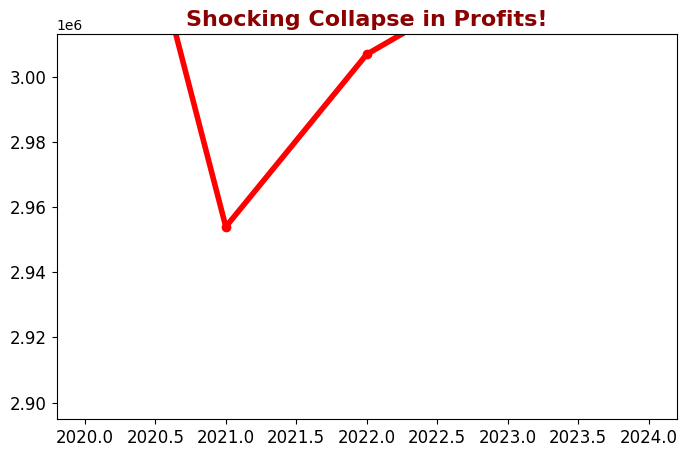

In [5]:
plt.figure(figsize=(8,5))
subset = coffee_df.groupby("Year")["Sales"].sum().reset_index()

# Wrong variable for title, truncated y-axis, misleading color & framing
plt.plot(subset["Year"], subset["Sales"], color="red", linewidth=4, marker="o")
plt.ylim(subset["Sales"].min() * 0.98, subset["Sales"].min() * 1.02)  # extreme truncation
plt.title("Shocking Collapse in Profits!", fontsize=16, fontweight="bold", color="darkred")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


## Observations:
1. Title Misleads:
The graph markedly goes up at the end. If they wanted to be convincingly insincere, they should have ended the x-axis at 2021.0.
2. Tiny Y-Axis:
The graph only measures a 10-point range, making this slight blip seem enormous.
3. Alarmist!!
The thick red line and red text with an exclamation point is too dramatic to be taken seriously.

________________________________________________________________________________________

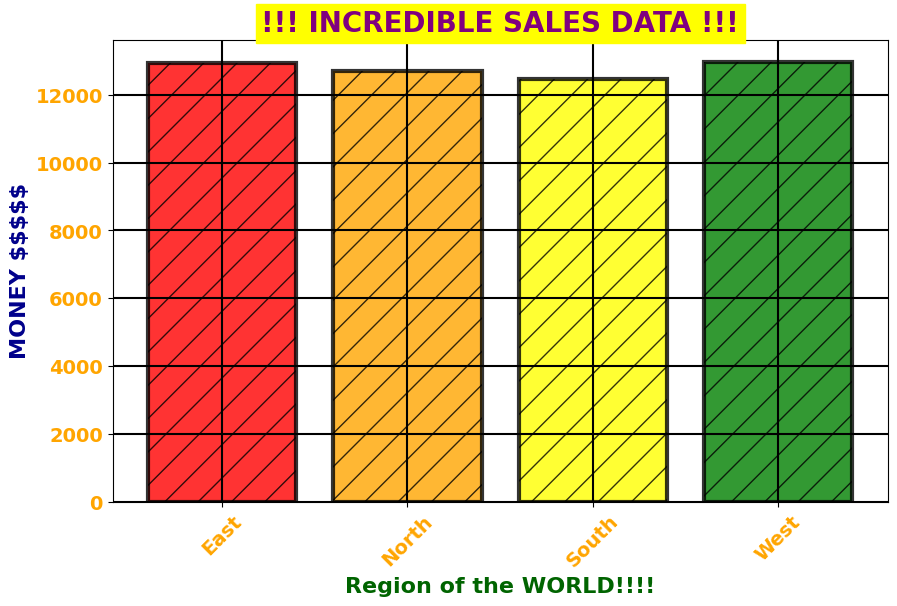

In [8]:
plt.figure(figsize=(10,6))
avg_sales = coffee_df.groupby("Region")["Sales"].mean().reset_index()

colors = ["red","orange","yellow","green","blue","purple"]

plt.bar(avg_sales["Region"], avg_sales["Sales"], 
        color=colors, edgecolor="black", linewidth=3, hatch="/", alpha=0.8)
plt.title("!!! INCREDIBLE SALES DATA !!!", fontsize=20, fontweight="bold", color="purple", backgroundcolor="yellow")
plt.grid(True, which='both', color='black', linestyle='-', linewidth=1.5)
plt.xlabel("Region of the WORLD!!!!", fontsize=16, fontweight="bold", color="darkgreen")
plt.ylabel("MONEY $$$$$", fontsize=16, fontweight="bold", color="darkblue")
plt.xticks(rotation=45, fontsize=14, fontweight="bold", color="orange")
plt.yticks(fontsize=14, fontweight="bold", color="orange")
plt.show()


## Observations:
1. Unclear:
It's incredibly unclear what this graph is even trying to argue. That all reigions of the world make money? It's a terrible story, terrible execution.
2. Again Alarmist!!:
The all-caps and ubiquitous puntuation makes this a very unserious infograph.
3. Design choices: 
The graph shows hatchmarks and grid lines which as well as being distracting is ugly as heck.

## Step 3: Your Turn – Make It Right

Now it’s your turn to fix things.  

- Start by thinking about a question you want to answer with this dataset.  
- Choose a visualization type that matches your question and the data structure.  
- Apply the best practices from our lessons: clear labeling, appropriate scale, purposeful color, simplicity, and accessibility.  
- Be honest - don’t manipulate the chart to make a point that the data doesn’t support.  

When you’re done, add your chart(s) below. You may create more than one if it helps tell the story better.  


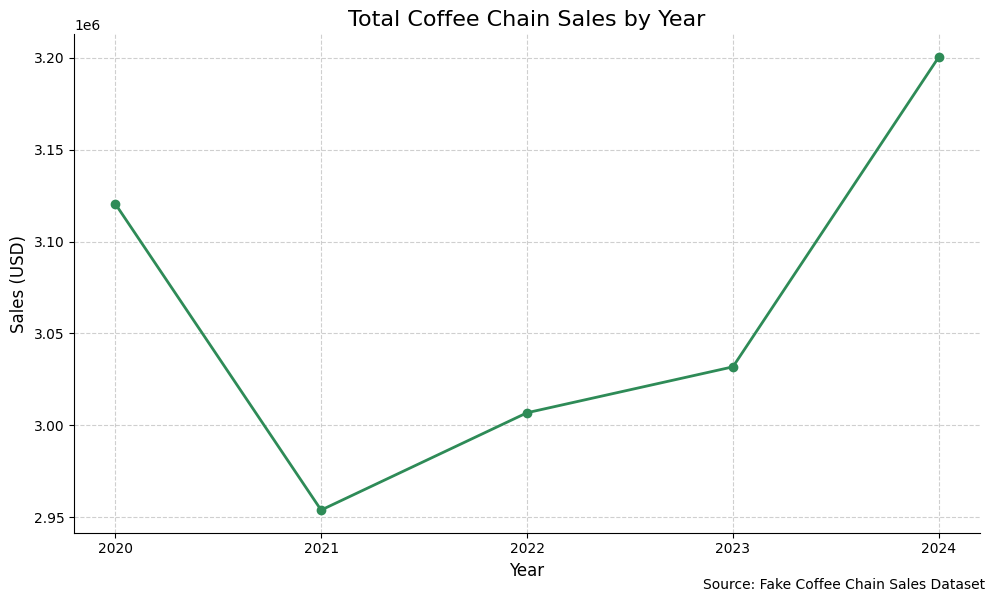

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
coffee_df = pd.read_csv("fake_coffee_chain_sales.csv")

# Summarize data
yearly_sales = coffee_df.groupby("Year")["Sales"].sum().reset_index()

# Plot
plt.figure(figsize=(10,6))
plt.plot(yearly_sales["Year"], yearly_sales["Sales"], marker="o", color="seagreen", linewidth=2)
plt.title("Total Coffee Chain Sales by Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Sales (USD)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(yearly_sales["Year"])
plt.tight_layout()
plt.figtext(0.99, 0.01, "Source: Fake Coffee Chain Sales Dataset", horizontalalignment='right', fontsize=10)

ax = plt.gca()  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

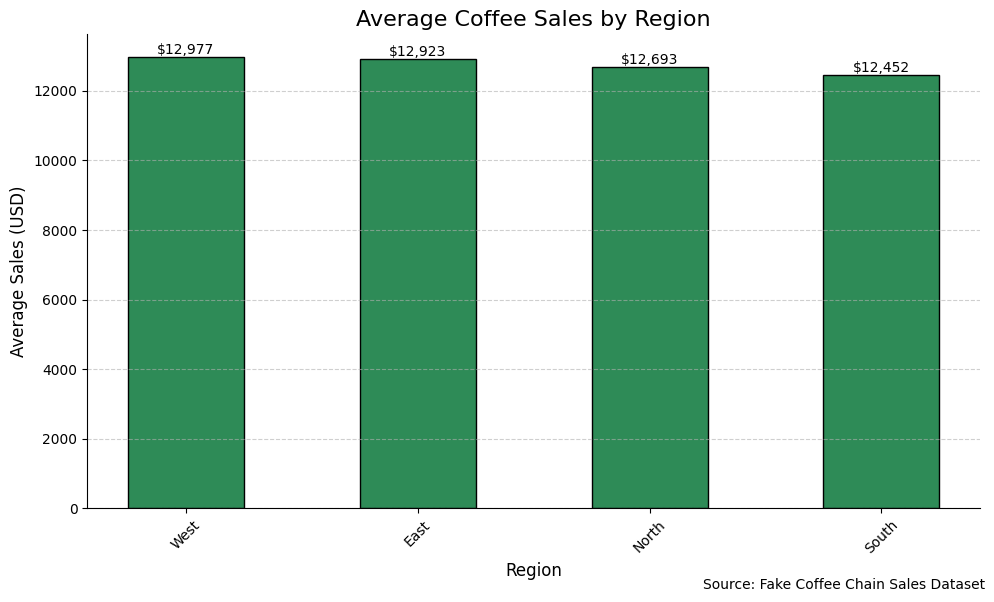

In [30]:
# Summarize data
region_avg_sales = coffee_df.groupby("Region")["Sales"].mean().reset_index().sort_values("Sales", ascending=False)

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(region_avg_sales["Region"], region_avg_sales["Sales"], color="seagreen", edgecolor="black", width=0.5)

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"${height:,.0f}", ha="center", va="bottom", fontsize=10)

plt.title("Average Coffee Sales by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Average Sales (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.figtext(0.99, 0.01, "Source: Fake Coffee Chain Sales Dataset", horizontalalignment='right', fontsize=10)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()